In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
#take mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train1 = x_train / 255
x_test1 = x_test / 255

x_train2 = np.expand_dims(x_train1.astype("float32"),-1)
x_test2 = np.expand_dims(x_test1.astype("float32") ,-1)

In [4]:
y_train1 = tf.keras.utils.to_categorical(y_train, 10)
y_test1 = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
inp = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu")(inp)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10, activation="softmax")(x)

In [6]:
model = tf.keras.Model(inputs=inp, outputs=x)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                8010  

In [8]:
es = tf.keras.callbacks.EarlyStopping( monitor="val_loss", patience=2, verbose=1, restore_best_weights=True)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.0005), metrics=["accuracy"])

out = model.fit(x_train2, y_train1, batch_size=128, epochs=50, validation_data=(x_test2,y_test1),verbose=1,callbacks=[es])

Epoch 1/50
469/469 [==============================] - 5s 9ms/step - loss: 1.0615 - accuracy: 0.7062 - val_loss: 0.1661 - val_accuracy: 0.9534
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1553 - accuracy: 0.9539 - val_loss: 0.1010 - val_accuracy: 0.9714
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1029 - accuracy: 0.9699 - val_loss: 0.0801 - val_accuracy: 0.9760
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0835 - accuracy: 0.9759 - val_loss: 0.0654 - val_accuracy: 0.9803
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0713 - accuracy: 0.9776 - val_loss: 0.0567 - val_accuracy: 0.9833
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0648 - accuracy: 0.9811 - val_loss: 0.0533 - val_accuracy: 0.9830
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0578 - accuracy: 0.9827 - val_loss: 0.0494 - val_accuracy: 0.9844
Epoch 

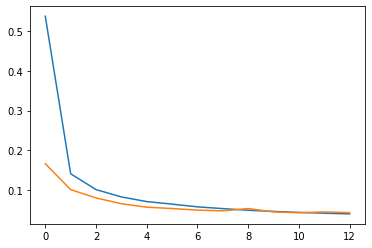

In [9]:
train_loss = out.history['loss']
test_loss = out.history['val_loss']
plt.plot(train_loss)
plt.plot(test_loss)
plt.show()

In [10]:
y_pred = model.predict(x_test2)
y_pred = (y_pred > 0.5) 

In [11]:
print('Accuracy on test data: {:0.2f}'.format(accuracy_score(y_test1, y_pred)))

Accuracy on test data: 0.99
